## Statistisk Analys av auto-mpg

### Medelvärde, Median och Standardavvikelse av auto-mpg

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

auto_mpg = pd.read_csv("./auto-mpg.csv")

auto_mpg.replace("?", np.nan, inplace=True) # I auto-mpg.csv så betäcknas saknad data som ett "?", så jag replacar alla "?" med NaN värde så att .mean .median .std funkar.

mpg_to_acceleration = auto_mpg.drop(columns=["model year", "origin", "car name"]) # Skapar ett nytt dataframe där bara de numeriska columnerna är med

mpg_to_acceleration = mpg_to_acceleration.astype(float) # Ändrar jag alla numerics till float värden för att columner som hade ett "?" innan skulle kunna köras med .mean m.m

mean_mpg = mpg_to_acceleration.mean()
median_mpg = mpg_to_acceleration.median()
standard_mpg = mpg_to_acceleration.std()
print(f"Medelvärdena för varje del av datasettet är:")
print(mean_mpg)
print()
print(f"Median för varje del av datasettet är:")
print(median_mpg)
print()
print(f"Standardavvikelse för varje del av datasettet är:")
print(standard_mpg)

Medelvärdena för varje del av datasettet är:
mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
dtype: float64

Median för varje del av datasettet är:
mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
dtype: float64

Standardavvikelse för varje del av datasettet är:
mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.491160
weight          846.841774
acceleration      2.757689
dtype: float64


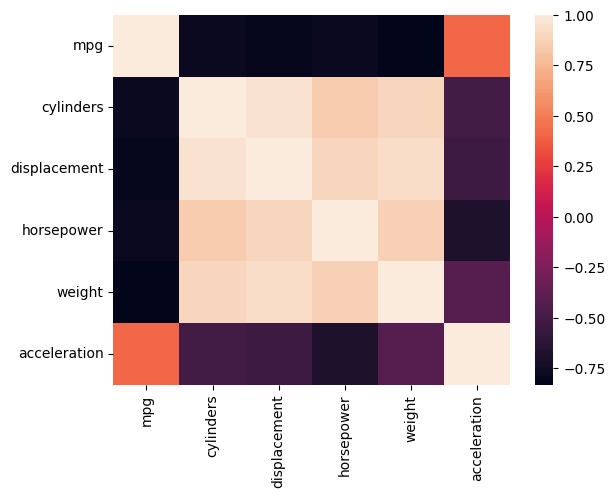

In [18]:
corr = auto_mpg[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].corr()
sns.heatmap(corr)
plt.show()